In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [5]:
df = pd.read_csv('/content/data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1,0.277726,0.314708,0.307351,0.596621,0.596650,0.998976,0.797176,0.809113,0.303138,...,0.664814,0.003231,0.623270,0.596619,0.902744,0.199162,0.026755,0.564978,1.0,0.008950
1871,1,0.310974,0.353576,0.343220,0.603533,0.603504,0.998950,0.796279,0.808239,0.301623,...,0.677638,0.012766,0.624307,0.603529,0.827522,0.283315,0.026761,0.565011,1.0,0.021443
1872,1,0.407059,0.462658,0.460785,0.587354,0.587354,0.998699,0.796952,0.808945,0.303326,...,0.747669,0.006222,0.622724,0.587352,0.833214,0.288444,0.026692,0.564636,1.0,0.017265
1873,0,0.403500,0.437963,0.445206,0.595447,0.595447,0.998913,0.797214,0.809150,0.303334,...,0.727566,0.023006,0.623864,0.595442,0.826583,0.296427,0.026712,0.564752,1.0,0.014683


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 1875 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  1875 non-null   float64
 2    ROA(A) before interest and % after tax                   1875 non-null   float64
 3    ROA(B) before interest and depreciation after tax        1875 non-null   float64
 4    Operating Gross Margin                                   1875 non-null   float64
 5    Realized Sales Gross Margin                              1875 non-null   float64
 6    Operating Profit Rate                                    1875 non-null   float64
 7    Pre-tax net Interest Rate                                1875 non-null   float64
 8    After-tax net Int

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,...,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.0,1874.000000
mean,0.053867,0.491703,0.545992,0.540257,0.604830,0.604808,0.998914,0.797281,0.809197,0.303450,...,0.800502,1.751334e+07,0.623877,0.604827,0.839660,0.280811,0.028650,0.565100,1.0,0.040887
std,0.225815,0.052782,0.056470,0.053377,0.015304,0.015278,0.000999,0.001679,0.001818,0.001253,...,0.038968,3.718675e+08,0.011650,0.015308,0.023535,0.016238,0.027756,0.022523,0.0,0.037499
min,0.000000,0.000000,0.000000,0.000000,0.156308,0.156308,0.973424,0.752969,0.761550,0.271546,...,0.000000,0.000000e+00,0.408682,0.156309,0.000000,0.000000,0.000789,0.000000,1.0,0.008950
25%,0.000000,0.470921,0.530664,0.523047,0.599223,0.599212,0.998960,0.797360,0.809290,0.303457,...,0.792960,9.700199e-04,0.623510,0.599220,0.839801,0.277454,0.026790,0.565158,1.0,0.023025
50%,0.000000,0.493784,0.551134,0.543980,0.603828,0.603807,0.999006,0.797434,0.809351,0.303521,...,0.804713,2.425577e-03,0.623781,0.603825,0.840772,0.279384,0.026844,0.565458,1.0,0.030747
75%,0.000000,0.516672,0.571740,0.565555,0.609320,0.609331,0.999052,0.797507,0.809412,0.303574,...,0.816865,5.994230e-03,0.624104,0.609325,0.841671,0.282240,0.027065,0.566372,1.0,0.044993
max,1.000000,0.733194,0.751581,0.734622,0.665151,0.665151,0.999458,0.799953,0.811018,0.309121,...,0.895453,9.820000e+09,1.000000,0.665149,1.000000,0.745352,1.000000,1.000000,1.0,0.798122


In [8]:
print(df['Bankrupt?'].value_counts())
print('-'*60)
print('Финансово стабильные: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% датасета')
print('Финансово стабильные: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% датасета')

Bankrupt?
0    1774
1     101
Name: count, dtype: int64
------------------------------------------------------------
Финансово стабильные:  94.61 % датасета
Финансово стабильные:  5.39 % датасета


In [9]:
df.columns = df.columns.str.strip()
russian_columns = [
    "Банкротство?",
    "ROA(C) до вычета процентов и амортизации",
    "ROA(A) до вычета процентов и % после налогообложения",
    "ROA(B) до вычета процентов и амортизации после налогообложения",
    "Операционная валовая маржа",
    "Валовая маржа от реализованных продаж",
    "Рентабельность операционной прибыли",
    "Чистая ставка процента до налогообложения",
    "Чистая ставка процента после налогообложения",
    "Внереализационные доходы и расходы / Выручка",
    "Ставка непрерывного дохода (после налогообложения)",
    "Коэффициент операционных расходов",
    "Коэффициент расходов на НИОКР",
    "Коэффициент денежного потока",
    "Ставка процента по долговым обязательствам",
    "Налоговая ставка (A)",
    "Чистая стоимость на акцию (B)",
    "Чистая стоимость на акцию (A)",
    "Чистая стоимость на акцию (C)",
    "Устойчивая прибыль на акцию за последние четыре сезона",
    "Денежный поток на акцию",
    "Выручка на акцию (юань ¥)",
    "Операционная прибыль на акцию (юань ¥)",
    "Чистая прибыль на акцию до налогообложения (юань ¥)",
    "Темп роста валовой прибыли от реализованных продаж",
    "Темп роста операционной прибыли",
    "Темп роста чистой прибыли после налогообложения",
    "Темп роста регулярной чистой прибыли",
    "Непрерывный темп роста чистой прибыли",
    "Темп роста общих активов",
    "Темп роста чистой стоимости",
    "Отношение темпа роста доходности активов",
    "Процент реинвестирования денежных средств",
    "Коэффициент текущей ликвидности",
    "Коэффициент быстрой ликвидности",
    "Коэффициент процентных расходов",
    "Общий долг / Общая чистая стоимость",
    "Процент коэффициента задолженности",
    "Чистая стоимость / Активы",
    "Коэффициент соответствия долгосрочных средств (A)",
    "Зависимость от заимствований",
    "Внебалансовые обязательства / Чистая стоимость",
    "Операционная прибыль / Внесённый капитал",
    "Чистая прибыль до налогообложения / Внесённый капитал",
    "Запасы и дебиторская задолженность / Чистая стоимость",
    "Оборачиваемость общих активов",
    "Оборачиваемость дебиторской задолженности",
    "Среднее число дней инкассации",
    "Коэффициент оборачиваемости запасов (раз)",
    "Частота оборачиваемости основных средств",
    "Коэффициент оборачиваемости чистой стоимости (раз)",
    "Выручка на одного человека",
    "Операционная прибыль на одного человека",
    "Норма распределения на одного человека",
    "Оборотный капитал / Общие активы",
    "Быстрые активы / Общие активы",
    "Текущие активы / Общие активы",
    "Денежные средства / Общие активы",
    "Быстрые активы / Текущие обязательства",
    "Денежные средства / Текущие обязательства",
    "Текущие обязательства / Активы",
    "Операционные средства / Обязательства",
    "Запасы / Оборотный капитал",
    "Запасы / Текущие обязательства",
    "Текущие обязательства / Общие обязательства",
    "Оборотный капитал / Собственный капитал",
    "Текущие обязательства / Собственный капитал",
    "Долгосрочные обязательства / Текущие активы",
    "Нераспределённая прибыль / Общие активы",
    "Общий доход / Общие расходы",
    "Общие расходы / Активы",
    "Темп оборачиваемости текущих активов",
    "Темп оборачиваемости быстрых активов",
    "Темп оборачиваемости оборотного капитала",
    "Темп оборачиваемости денежных средств",
    "Денежный поток / Продажи",
    "Основные средства / Активы",
    "Текущие обязательства / Общие обязательства",
    "Текущие обязательства / Собственный капитал",
    "Собственный капитал / Долгосрочные обязательства",
    "Денежный поток / Общие активы",
    "Денежный поток / Обязательства",
    "Операционный денежный поток / Активы",
    "Денежный поток / Собственный капитал",
    "Текущие обязательства / Текущие активы",
    "Флаг обязательства-активы",
    "Чистая прибыль / Общие активы",
    "Общие активы / Цена ВНП",
    "Период без привлечения кредита",
    "Валовая прибыль / Продажи",
    "Чистая прибыль / Собственный капитал",
    "Обязательства / Собственный капитал",
    "Степень финансового рычага (DFL)",
    "Коэффициент покрытия процентов (Процентные расходы / EBIT)",
    "Флаг чистой прибыли",
    "Собственный капитал / Обязательства"
]

df.columns = russian_columns
df


,Банкротство?,ROA(C) до вычета процентов и амортизации,ROA(A) до вычета процентов и % после налогообложения,ROA(B) до вычета процентов и амортизации после налогообложения,Операционная валовая маржа,Валовая маржа от реализованных продаж,Рентабельность операционной прибыли,Чистая ставка процента до налогообложения,Чистая ставка процента после налогообложения,Внереализационные доходы и расходы / Выручка,...,Чистая прибыль / Общие активы,Общие активы / Цена ВНП,Период без привлечения кредита,Валовая прибыль / Продажи,Чистая прибыль / Собственный капитал,Обязательства / Собственный капитал,Степень финансового рычага (DFL),Коэффициент покрытия процентов (Процентные расходы / EBIT),Флаг чистой прибыли,Собственный капитал / Обязательства
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1,0.277726,0.314708,0.307351,0.596621,0.596650,0.998976,0.797176,0.809113,0.303138,...,0.664814,0.003231,0.623270,0.596619,0.902744,0.199162,0.026755,0.564978,1.0,0.008950
1871,1,0.310974,0.353576,0.343220,0.603533,0.603504,0.998950,0.796279,0.808239,0.301623,...,0.677638,0.012766,0.624307,0.603529,0.827522,0.283315,0.026761,0.565011,1.0,0.021443
1872,1,0.407059,0.462658,0.460785,0.587354,0.587354,0.998699,0.796952,0.808945,0.303326,...,0.747669,0.006222,0.622724,0.587352,0.833214,0.288444,0.026692,0.564636,1.0,0.017265
1873,0,0.403500,0.437963,0.445206,0.595447,0.595447,0.998913,0.797214,0.809150,0.303334,...,0.727566,0.023006,0.623864,0.595442,0.826583,0.296427,0.026712,0.564752,1.0,0.014683


In [10]:
df.duplicated().sum()
df = df.drop('Флаг чистой прибыли',axis = 1)

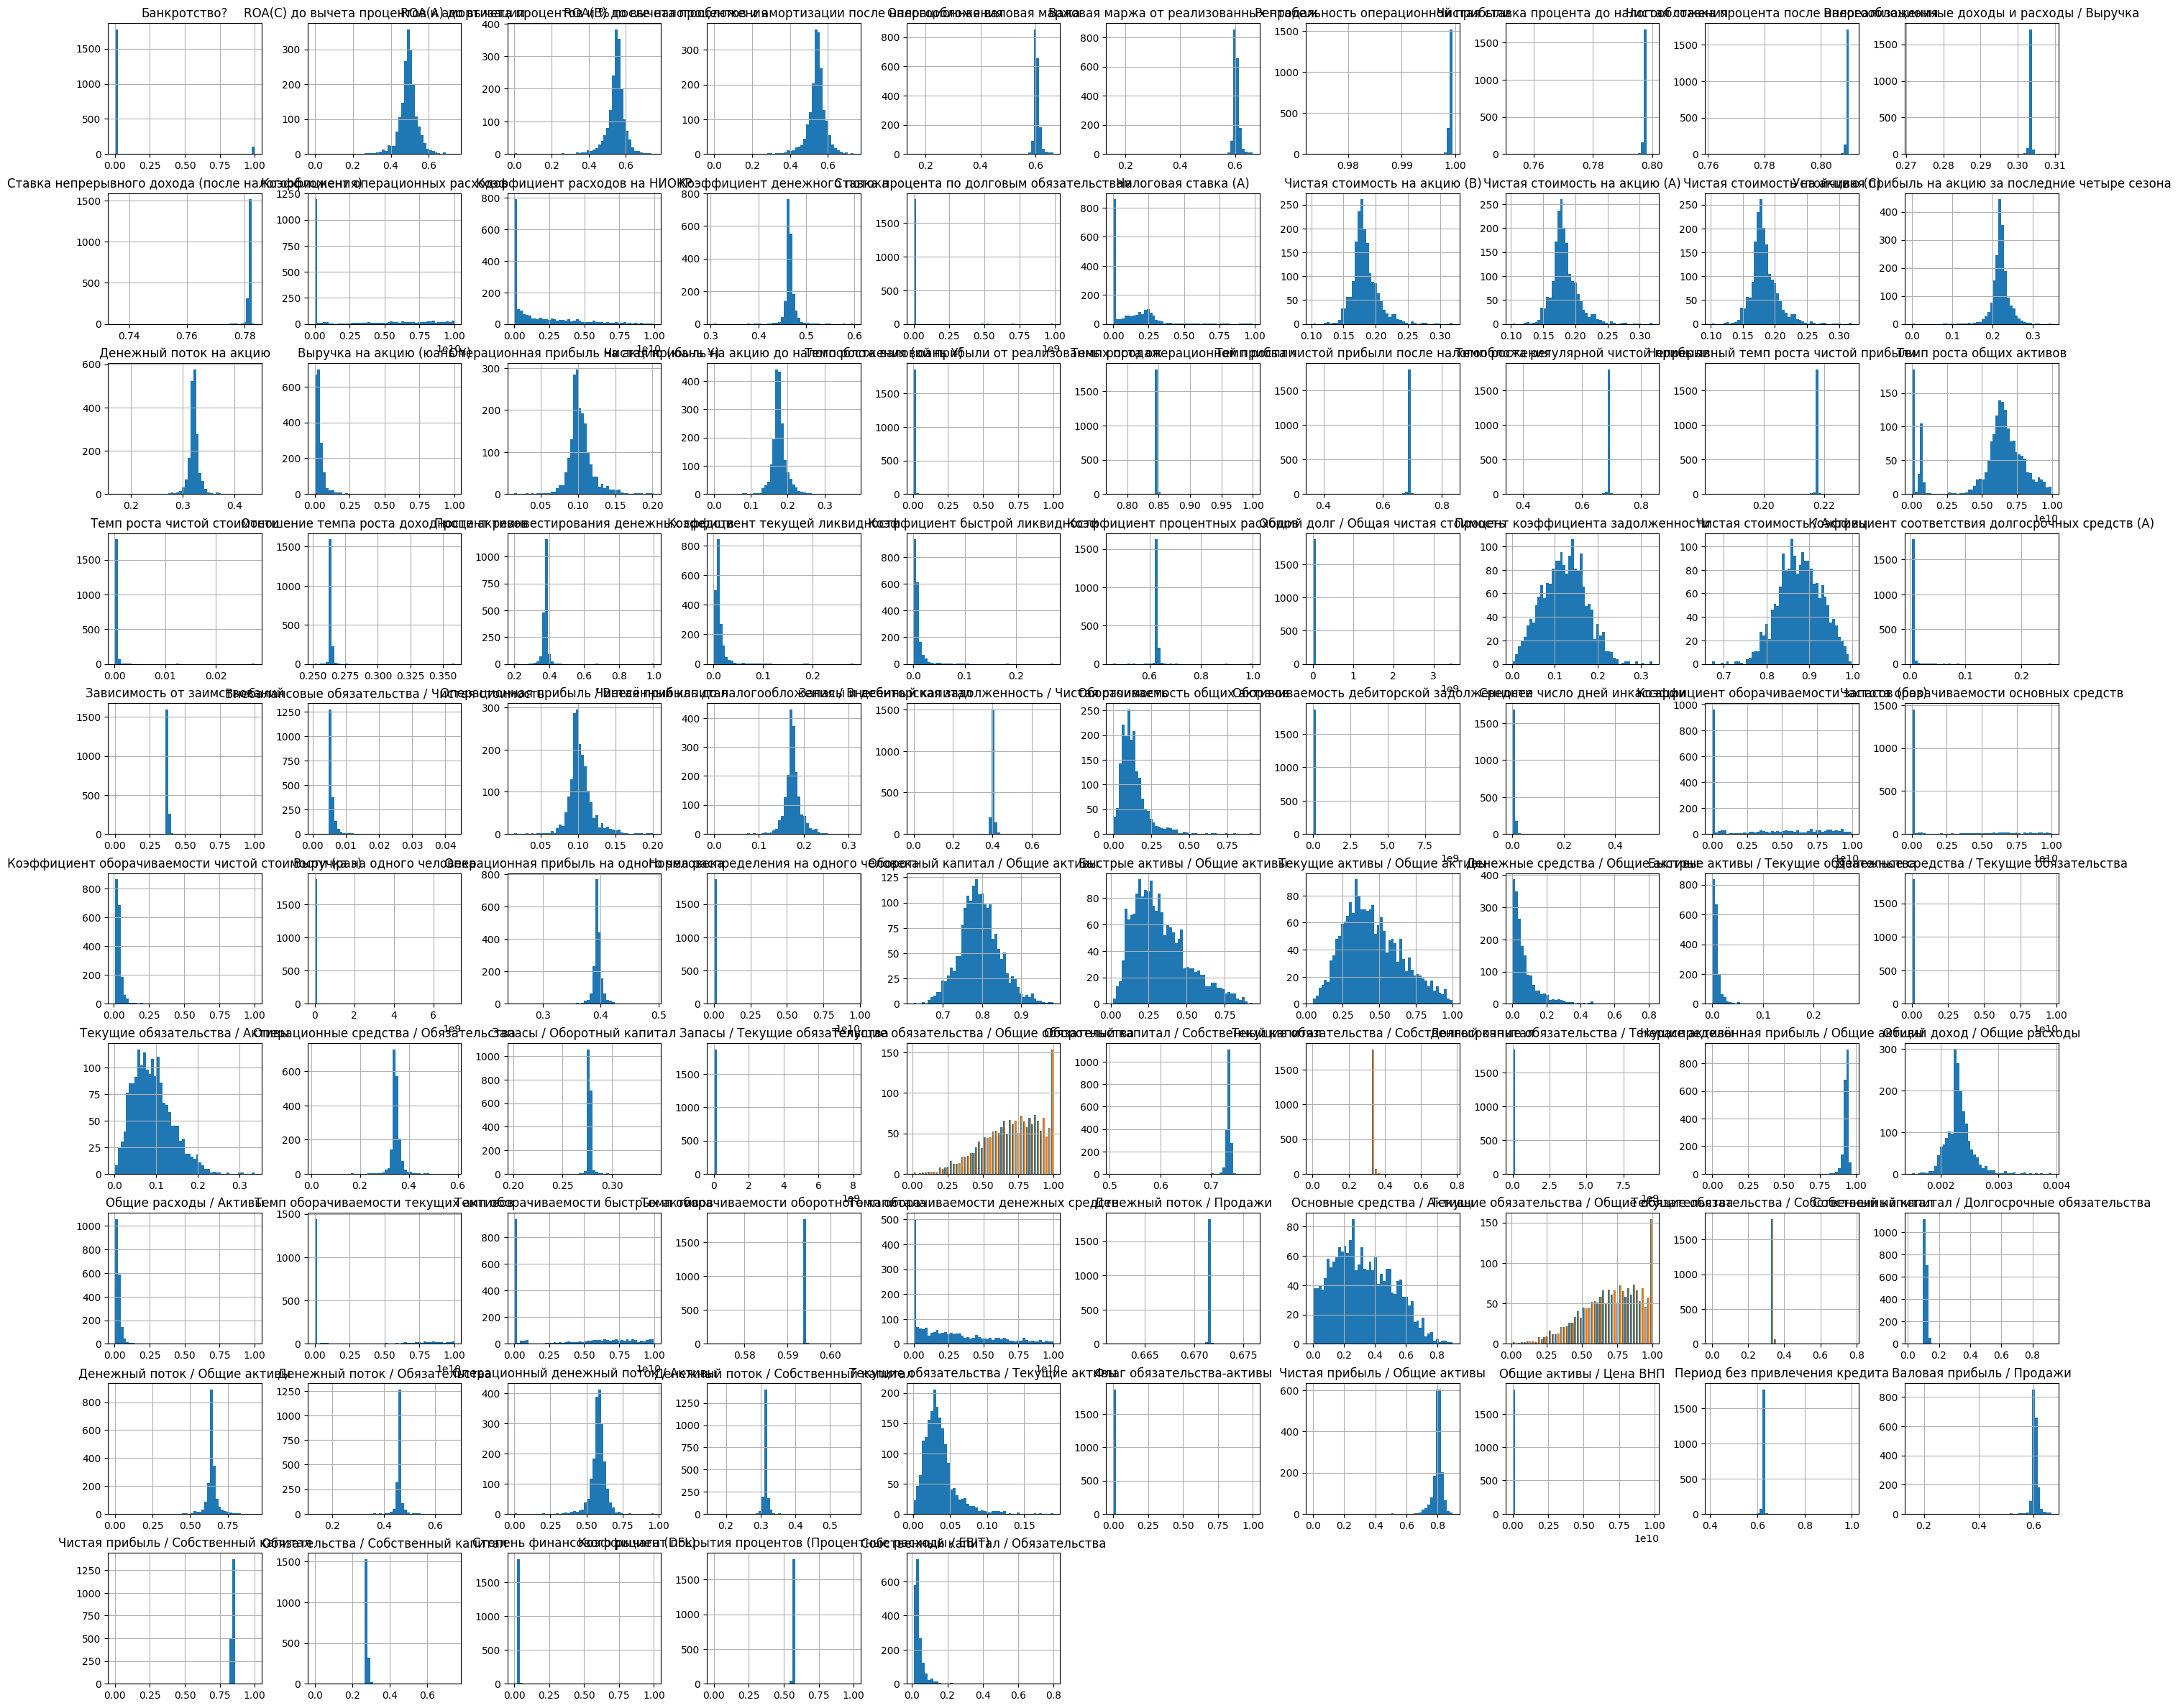

In [11]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

<Figure size 1200x1000 with 0 Axes>

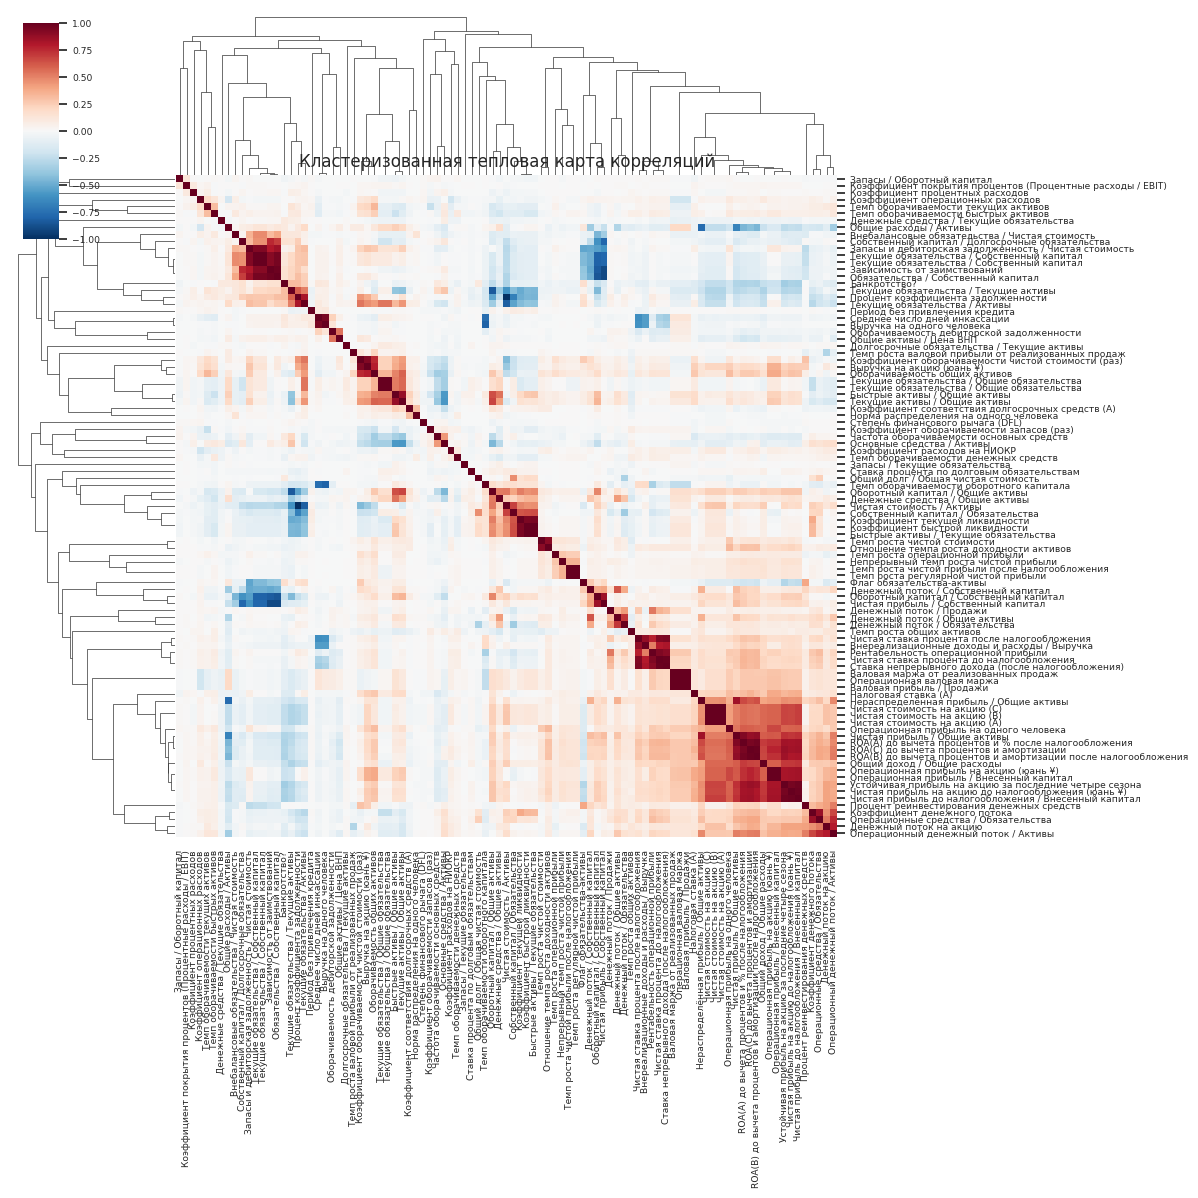

In [12]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.6)
clustermap = sns.clustermap(
    corr,
    method='average',
    metric='correlation',
    cmap='RdBu_r',
    vmin=-1, vmax=1,
    figsize=(12, 12),
    yticklabels=True, xticklabels=True,
    dendrogram_ratio=(0.2, 0.2),
    cbar_pos=(0.02, 0.8, 0.03, 0.18)
)
clustermap.ax_heatmap.set_title("Кластеризованная тепловая карта корреляций", fontsize=12)
plt.show()

In [13]:
features = df.drop(columns=['Банкротство?']).apply(pd.to_numeric, errors='coerce')
y = df['Банкротство?']
model_df= pd.concat([features, y], axis=1).dropna()
X = model_df.drop(columns=['Банкротство?'])
y_final = model_df['Банкротство?']

<ipython-input-14-9316bbec4442>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Не-банкрот', 'Банкрот'], y=counts.values, palette=['#4c72b0', '#c44e52'])


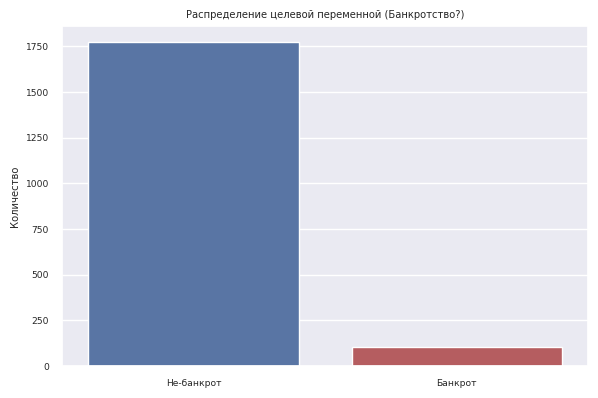

In [14]:
plt.figure(figsize=(6,4))
counts = y_final.value_counts().sort_index()
sns.barplot(x=['Не-банкрот', 'Банкрот'], y=counts.values, palette=['#4c72b0', '#c44e52'])
plt.title('Распределение целевой переменной (Банкротство?)')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

In [15]:
desc = X.describe().T
display(desc.head(10))

,count,mean,std,min,25%,50%,75%,max
ROA(C) до вычета процентов и амортизации,1874.0,0.491720,0.052791,0.000000,0.471031,0.493784,0.516709,0.733194
ROA(A) до вычета процентов и % после налогообложения,1874.0,0.546006,0.056482,0.000000,0.530814,0.551161,0.571740,0.751581
ROA(B) до вычета процентов и амортизации после налогообложения,1874.0,0.540272,0.053387,0.000000,0.523208,0.543980,0.565555,0.734622
Операционная валовая маржа,1874.0,0.604829,0.015308,0.156308,0.599220,0.603828,0.609327,0.665151
Валовая маржа от реализованных продаж,1874.0,0.604807,0.015282,0.156308,0.599210,0.603807,0.609332,0.665151
Рентабельность операционной прибыли,1874.0,0.998914,0.001000,0.973424,0.998960,0.999006,0.999052,0.999458
Чистая ставка процента до налогообложения,1874.0,0.797281,0.001680,0.752969,0.797361,0.797434,0.797507,0.799953
Чистая ставка процента после налогообложения,1874.0,0.809197,0.001819,0.761550,0.809290,0.809351,0.809412,0.811018
Внереализационные доходы и расходы / Выручка,1874.0,0.303450,0.001254,0.271546,0.303457,0.303521,0.303574,0.309121
Ставка непрерывного дохода (после налогообложения),1874.0,0.781459,0.001631,0.735093,0.781538,0.781607,0.781669,0.783426


,Банкротство?
Устойчивая прибыль на акцию за последние четыре сезона,0.344497
Чистая прибыль до налогообложения / Внесённый капитал,0.326005
Чистая прибыль на акцию до налогообложения (юань ¥),0.312561
ROA(A) до вычета процентов и % после налогообложения,0.310915
Текущие обязательства / Текущие активы,0.307931


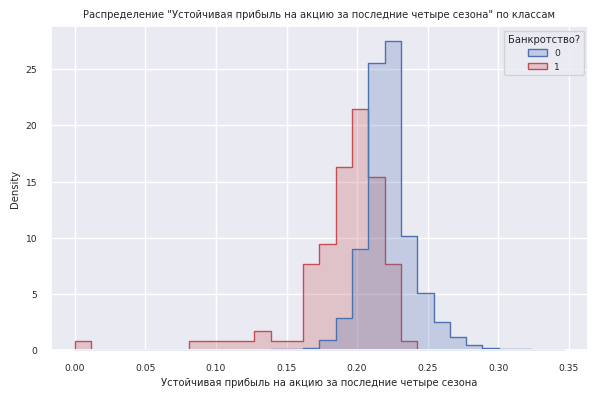

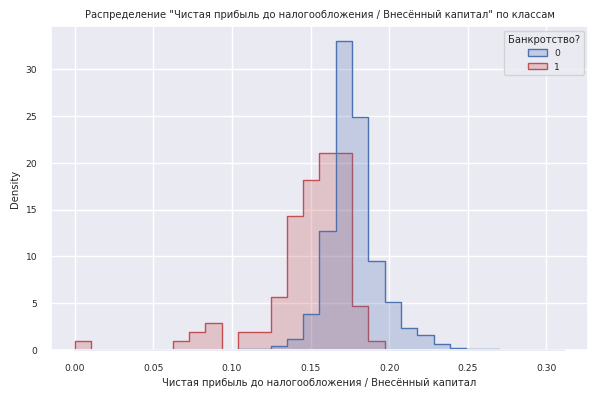

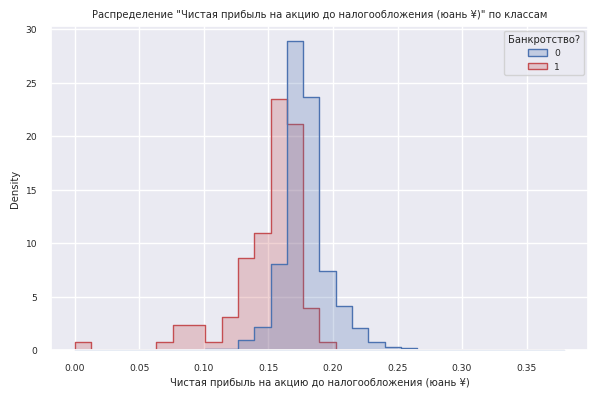

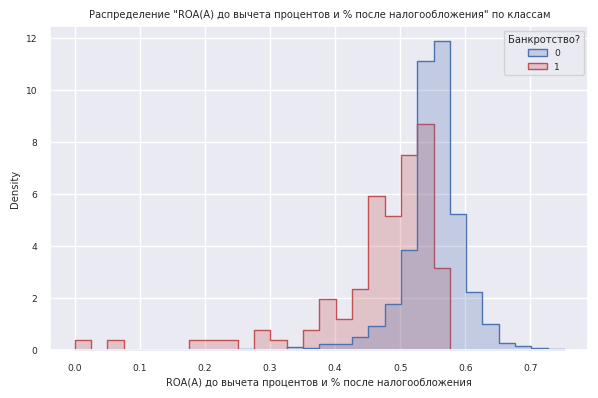

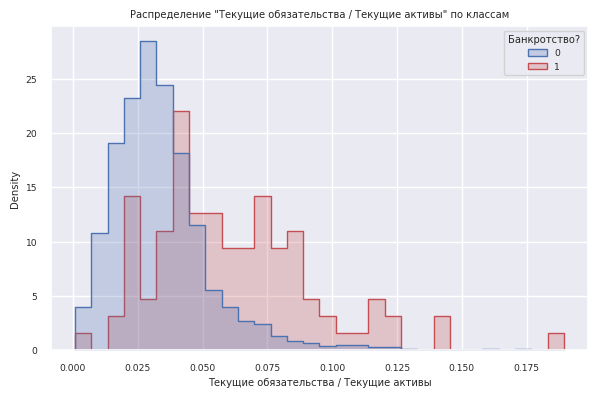

<Figure size 1000x800 with 0 Axes>

In [16]:
joined = pd.concat([X, y_final], axis=1)
corr_with_target = joined.corr()['Банкротство?'].abs().sort_values(ascending=False).drop('Банкротство?')
top5_corr = corr_with_target.head(5)
display(top5_corr)
for feat in top5_corr.index:
    plt.figure(figsize=(6,4))
    sns.histplot(data=joined, x=feat, hue='Банкротство?', bins=30, palette=['#4c72b0', '#c44e52'], element='step', stat='density', common_norm=False)
    plt.title(f'Распределение "{feat}" по классам')
    plt.tight_layout()
    plt.show()
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
plt.show()

In [18]:
target = df['Банкротство?']
model_df = pd.concat([features, target], axis=1).dropna()
X_full = model_df.drop(columns=['Банкротство?'])
y_full = model_df['Банкротство?']


In [19]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42, stratify=y_full
)

In [21]:
pipe_lr_full = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear', max_iter=1000))
])
param_grid_lr = {'lr__C': [0.01, 0.1, 1, 10]}
grid_lr_full = GridSearchCV(pipe_lr_full, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr_full.fit(X_train_full, y_train_full)
best_lr_full = grid_lr_full.best_estimator_
y_proba_lr_full = best_lr_full.predict_proba(X_test_full)[:, 1]
auc_lr_full = roc_auc_score(y_test_full, y_proba_lr_full)

print("Logistic Regression (95 признаков): best_params =", grid_lr_full.best_params_, ", ROC AUC =", auc_lr_full)
print(classification_report(y_test_full, best_lr_full.predict(X_test_full), target_names=['Не-банкрот','Банкрот']))

Logistic Regression (95 признаков): best_params = {'lr__C': 0.01} , ROC AUC = 0.9202626641651033
              precision    recall  f1-score   support

  Не-банкрот       0.96      0.99      0.97       533
     Банкрот       0.50      0.20      0.29        30

    accuracy                           0.95       563
   macro avg       0.73      0.59      0.63       563
weighted avg       0.93      0.95      0.94       563



In [22]:
pipe_rf_full = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}
grid_rf_full = GridSearchCV(pipe_rf_full, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf_full.fit(X_train_full, y_train_full)
best_rf_full = grid_rf_full.best_estimator_
y_proba_rf_full = best_rf_full.predict_proba(X_test_full)[:, 1]
auc_rf_full = roc_auc_score(y_test_full, y_proba_rf_full)

print("\nRandom Forest (95 признаков): best_params =", grid_rf_full.best_params_, ", ROC AUC =", auc_rf_full)
print(classification_report(y_test_full, best_rf_full.predict(X_test_full), target_names=['Не-банкрот','Банкрот']))


Random Forest (95 признаков): best_params = {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200} , ROC AUC = 0.9437148217636022
              precision    recall  f1-score   support

  Не-банкрот       0.96      0.98      0.97       533
     Банкрот       0.52      0.37      0.43        30

    accuracy                           0.95       563
   macro avg       0.74      0.67      0.70       563
weighted avg       0.94      0.95      0.94       563



In [23]:
pipe_gb_full = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])
param_grid_gb = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [3, 5]
}
grid_gb_full = GridSearchCV(pipe_gb_full, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gb_full.fit(X_train_full, y_train_full)
best_gb_full = grid_gb_full.best_estimator_
y_proba_gb_full = best_gb_full.predict_proba(X_test_full)[:, 1]
auc_gb_full = roc_auc_score(y_test_full, y_proba_gb_full)

print("\nGradient Boosting (95 признаков): best_params =", grid_gb_full.best_params_, ", ROC AUC =", auc_gb_full)
print(classification_report(y_test_full, best_gb_full.predict(X_test_full), target_names=['Не-банкрот','Банкрот']))


Gradient Boosting (95 признаков): best_params = {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 200} , ROC AUC = 0.924859287054409
              precision    recall  f1-score   support

  Не-банкрот       0.96      0.99      0.98       533
     Банкрот       0.69      0.30      0.42        30

    accuracy                           0.96       563
   macro avg       0.83      0.65      0.70       563
weighted avg       0.95      0.96      0.95       563



In [24]:
comparison_full = pd.DataFrame({
    'Модель': ['LogisticRegression', 'RandomForest', 'GradientBoosting'],
    'ROC AUC (95 признаков)': [auc_lr_full, auc_rf_full, auc_gb_full]
})
print("\nСравнение моделей на всех 95 признаках:")
print(comparison_full)



Сравнение моделей на всех 95 признаках:
               Модель  ROC AUC (95 признаков)
0  LogisticRegression                0.920263
1        RandomForest                0.943715
2    GradientBoosting                0.924859


In [25]:
coefs = best_lr_full.named_steps['lr'].coef_[0]
feat_imp_lr = pd.DataFrame({
    'Признак': X_full.columns,
    'Важность': abs(coefs)
}).sort_values(by='Важность', ascending=False)
top10_lr = feat_imp_lr.head(10)['Признак'].tolist()

print("\nТоп-10 признаков по LogisticRegression (95):")
for idx, feat in enumerate(top10_lr, 1):
    print(f"{idx}. {feat}")


Топ-10 признаков по LogisticRegression (95):
1. Собственный капитал / Долгосрочные обязательства
2. Флаг обязательства-активы
3. Чистая стоимость / Активы
4. Процент коэффициента задолженности
5. Денежные средства / Текущие обязательства
6. Частота оборачиваемости основных средств
7. Текущие обязательства / Текущие активы
8. Общий долг / Общая чистая стоимость
9. Текущие обязательства / Активы
10. Темп оборачиваемости денежных средств


In [26]:
importances_rf = best_rf_full.named_steps['rf'].feature_importances_
feat_imp_rf = pd.DataFrame({
    'Признак': X_full.columns,
    'Важность': importances_rf
}).sort_values(by='Важность', ascending=False)
top10_rf = feat_imp_rf.head(10)['Признак'].tolist()

print("\nТоп-10 признаков по RandomForest (95):")
for idx, feat in enumerate(top10_rf, 1):
    print(f"{idx}. {feat}")



Топ-10 признаков по RandomForest (95):
1. Зависимость от заимствований
2. Собственный капитал / Обязательства
3. Чистая прибыль до налогообложения / Внесённый капитал
4. Чистая стоимость / Активы
5. Оборотный капитал / Собственный капитал
6. Чистая стоимость на акцию (B)
7. Коэффициент быстрой ликвидности
8. Обязательства / Собственный капитал
9. Устойчивая прибыль на акцию за последние четыре сезона
10. Ставка непрерывного дохода (после налогообложения)


In [27]:
importances_gb = best_gb_full.named_steps['gb'].feature_importances_
feat_imp_gb = pd.DataFrame({
    'Признак': X_full.columns,
    'Важность': importances_gb
}).sort_values(by='Важность', ascending=False)
top10_gb = feat_imp_gb.head(10)['Признак'].tolist()

print("\nТоп-10 признаков по GradientBoosting (95):")
for idx, feat in enumerate(top10_gb, 1):
    print(f"{idx}. {feat}")



Топ-10 признаков по GradientBoosting (95):
1. Чистая прибыль до налогообложения / Внесённый капитал
2. Зависимость от заимствований
3. Оборотный капитал / Собственный капитал
4. Норма распределения на одного человека
5. Денежные средства / Общие активы
6. Ставка непрерывного дохода (после налогообложения)
7. Коэффициент быстрой ликвидности
8. Запасы / Оборотный капитал
9. Чистая ставка процента после налогообложения
10. Чистая стоимость на акцию (C)


In [28]:
def retrain(model_cls, params, top_feats):
    X_top = X_full[top_feats]
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_top, y_full, test_size=0.3, random_state=42, stratify=y_full
    )
    if model_cls is LogisticRegression:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('lr', LogisticRegression(**params, solver='liblinear', max_iter=1000))
        ])
    else:
        name = model_cls.__name__.lower()
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (name, model_cls(**params, random_state=42))
        ])
    pipeline.fit(X_tr, y_tr)
    y_pr = pipeline.predict_proba(X_te)[:, 1]
    auc = roc_auc_score(y_te, y_pr)
    report = classification_report(y_te, pipeline.predict(X_te), target_names=['Не-банкрот','Банкрот'])
    return auc, report, pipeline

lr_params = {'C': grid_lr_full.best_params_['lr__C']}
rf_params = {
    'n_estimators': grid_rf_full.best_params_['rf__n_estimators'],
    'max_depth': grid_rf_full.best_params_['rf__max_depth'],
    'min_samples_split': grid_rf_full.best_params_['rf__min_samples_split']
}
gb_params = {
    'n_estimators': grid_gb_full.best_params_['gb__n_estimators'],
    'learning_rate': grid_gb_full.best_params_['gb__learning_rate'],
    'max_depth': grid_gb_full.best_params_['gb__max_depth']
}

auc_lr_top, report_lr_top, model_lr_top = retrain(LogisticRegression, lr_params, top10_lr)
print("\nLogistic Regression (топ-10): ROC AUC =", auc_lr_top)
print(report_lr_top)

auc_rf_top, report_rf_top, model_rf_top = retrain(RandomForestClassifier, rf_params, top10_rf)
print("\nRandom Forest (топ-10): ROC AUC =", auc_rf_top)
print(report_rf_top)

auc_gb_top, report_gb_top, model_gb_top = retrain(GradientBoostingClassifier, gb_params, top10_gb)
print("\nGradient Boosting (топ-10): ROC AUC =", auc_gb_top)
print(report_gb_top)


Logistic Regression (топ-10): ROC AUC = 0.8689180737961226
              precision    recall  f1-score   support

  Не-банкрот       0.95      1.00      0.97       533
     Банкрот       0.60      0.10      0.17        30

    accuracy                           0.95       563
   macro avg       0.78      0.55      0.57       563
weighted avg       0.93      0.95      0.93       563


Random Forest (топ-10): ROC AUC = 0.9302063789868669
              precision    recall  f1-score   support

  Не-банкрот       0.96      0.98      0.97       533
     Банкрот       0.48      0.33      0.39        30

    accuracy                           0.94       563
   macro avg       0.72      0.66      0.68       563
weighted avg       0.94      0.94      0.94       563


Gradient Boosting (топ-10): ROC AUC = 0.9314258911819887
              precision    recall  f1-score   support

  Не-банкрот       0.96      0.98      0.97       533
     Банкрот       0.56      0.33      0.42        30

    accura

In [29]:
comparison_top = pd.DataFrame({
    'Модель': ['LogisticRegression', 'RandomForest', 'GradientBoosting'],
    'ROC AUC (топ-10)': [auc_lr_top, auc_rf_top, auc_gb_top]
})
print("\nСравнение моделей на собственных топ-10 признаках:")
print(comparison_top)


Сравнение моделей на собственных топ-10 признаках:
               Модель  ROC AUC (топ-10)
0  LogisticRegression          0.868918
1        RandomForest          0.930206
2    GradientBoosting          0.931426


In [37]:
import joblib
joblib.dump(best_lr_full, 'model_lr_95.pkl')
joblib.dump(best_rf_full, 'model_rf_95.pkl')
joblib.dump(best_gb_full, 'model_gb_95.pkl')
joblib.dump(model_lr_top, 'model_lr_top10.pkl')
joblib.dump(model_rf_top, 'model_rf_top10.pkl')
joblib.dump(model_gb_top, 'model_gb_top10.pkl')

['model_gb_top10.pkl']